In [1]:
# Load in packages
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.special as sc
import pandas as pd
import scipy.stats as stats
from scipy.stats import hypergeom, probplot
from pprint import pprint

$\text{Problem 1.}$

(a) To show that original integral is equal to the new integral $I$, we will plug in $z = \frac{(1-\cos(\pi x))}{2}$ and show that it is indeed the same as the original integral. First, it will be useful to express $x$ in terms of see as follows, using the fact that $z = \frac{1-\cos\pi x}{2} \implies \cos \pi x = 1 - 2z,$
\begin{align*}
(2 \sqrt{z(1-z)})^2 &= 4z - 4z^2 \\
&= 1 - ( 1 - 4z + 4z^2)\\
&= 1 - (1-2z)^2 \\
&= 1 - \cos^2 \pi x \\
&= \sin^2 \pi x.
\end{align*}
So, comparing the start and end of the above sequence of equations, we see that $(2\sqrt{z(1-z)})^2 = \sin^2 \pi x$, or $2\sqrt{z(1-z)} = \sin \pi x.$ Now, Using the fact that $dz = dx \cdot \frac{\pi \sin(\pi x)}{2}$ we see that
\begin{align*}
I &= \int_0^1 (1-2z)^2 \frac{dz}{\pi\sqrt{z(1-z)}} \\
&= \int_0^1 \bigg(1 - 2 \frac{(1-\cos(\pi x))}{2}\bigg)^2  \frac{dx \cdot \frac{\pi \sin(\pi x)}{2}}{\frac{\pi}{2} \sqrt{z(1-z)}} && \text{(plug in for $z$ and $d$)} \\
&= \int_0^1 \cos^2(\pi x) \frac{\pi \sin \pi x}{\pi\sin \pi x}  dx &&\text{(Use the above simplification of $2\sqrt{z(1-z)}$)}\\
&= \int_0^1  \cos^2(\pi x) dx,
\end{align*}
which is indeed the original integral.

(b) To formulate the inverse CDF sampler for the arcsince distribution, we simply take the inverse of the CDF, as suggested by the name, and use $U\sim\text{Unif}(0,1)$ random variables as inputs, since the range of any CDF is $(0,1)$. Therefore, the domain of the inverse should take values from this interval, which is nicely done using a uniform random variable. We have that the CDF of the given arcsine distribution is 
$$ F_Z = \frac{2}{\pi} \arcsin \sqrt{x} = \frac{2}{\pi}\sin^{\text{-}1}\sqrt{x}. $$
So, inverting the CDF gives us the expression for our sampler
\begin{align*}
u &= \frac{2}{\pi} \sin^{\text{-}1}\sqrt{F_Z^{\text{-}1}} \\
\frac{\pi u}{2} &= \sin^{\text{-}1}\sqrt{F_Z^{\text{-}1}} \\
F_Z^{\text{-}1} &= \sin^2 \frac{\pi u}{2},
\end{align*}
where again $U$ is a continuous standard uniform r.v..

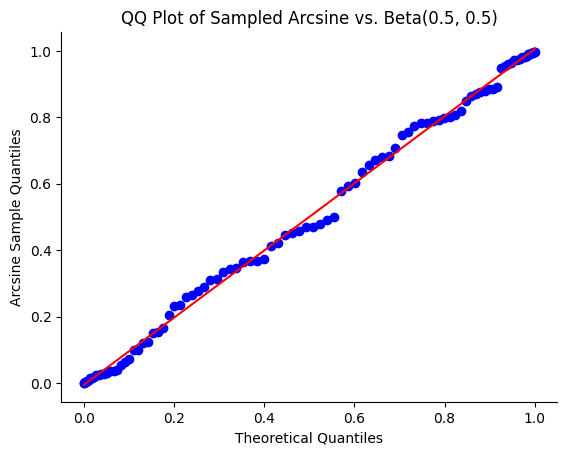

In [4]:
# Problem 1 b) 

# Function that evaluates the inverse CDF of the arcsine distribution. 
# Takes in inputs between 0.0 and 1.0.

def inv_cdf_arcsine(x):
    return np.sin( (np.pi * x )/ 2) **2

# Function that takes in a number of iterations, then generates samples of an 
# arcsine RV using the inverse CDF, which takes as inputs a standard uniform RV

def sample_arcsine(kiter):
    sim_samp_arcsine = []
    U = 0
    for i in range(kiter):
        U = np.random.uniform(0,1)
        sim_samp_arcsine.insert(i, inv_cdf_arcsine(U) )
    return sim_samp_arcsine

samp_kiter = 100
arcsine_samp = sample_arcsine(samp_kiter) 

probplot(arcsine_samp, dist="beta", sparams=(0.5, 0.5), plot=plt)

plt.title('QQ Plot of Sampled Arcsine vs. Beta(0.5, 0.5)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Arcsine Sample Quantiles')
sns.despine()
plt.show()

(b) Since the realizations of the arcsine distribution (computed from the inverse CDF sampler) generally fall close to the line for all theoritical quantiles of the $\text{Beta}(1/2, 1/2)$ distribution, which is known to be equivalent to the given arcsine distribution, we have verified that the arcsine sampler is working correctly. The deviations from the line may be explained by the inherent variability in the inverse CDF sampler, stemming from the step where we draw a random standard uniform observation as the input of the sampler. It is possible that a high proportion of low probability observations may be realized from only 100 total observations. When we set the number of simulated observations to be 1000, we observe a trend that more closely follows the $\text{Beta}(1/2, 1/2)$ distribution. 

In [5]:
# Problem 1 c) 

# MC Est of original integral (naive)

est_kiter = 1000

def MC_Est_original(est_kiter):
    sim_samp_naive = []
    for i in range(est_kiter):
        U = np.random.uniform(0,1)
        sim_samp_naive.insert(i, np.cos(np.pi*U)**2)
    return np.mean(sim_samp_naive)

# Use MC integration to estimate the mean of the desired integral by using the
# arcsine CDF sampler
#------------------------------------------------------------------------------------
# When we input the integral to Symbolab, we get that the exact answer should be 1/2, 
# indicating that our naive MC estimate is very close to the true value after 1000 iterations.

true_I = 0.5
MC_Est_naive_result = MC_Est_original(est_kiter)
print('Naive Estimate =', MC_Est_naive_result)
print('Abs Error (Naive Est) =', abs(MC_Est_naive_result- .5))

def MC_Est_arcsine(est_kiter):
    I_hat_2 = []
    sim_samp_arcsine = sample_arcsine(est_kiter)
    for i in range(est_kiter):
        I_hat_2.append((1 - 2*sim_samp_arcsine[i])**2)
    return np.mean(I_hat_2)

MC_Est_arcsine_result = MC_Est_arcsine(est_kiter)
print('Arcsine Est =', MC_Est_arcsine_result)
print('Abs Error (arcsine Est) =', abs(MC_Est_arcsine_result - 0.5))

# Variance of hat{I}_1 and hat{I}_2. 
I_hats_1 = []
I_hats_2 = []
for _ in range(est_kiter):
    I_hats_1.append(MC_Est_original(est_kiter))
    I_hats_2.append(MC_Est_arcsine(est_kiter))

print('Var(I_1) =', np.var(I_hats_1))
print('Var(I_2) =', np.var(I_hats_2))

Naive Estimate = 0.5030095556685589
Abs Error (Naive Est) = 0.003009555668558872
Arcsine Est = 0.49249700866811785
Abs Error (arcsine Est) = 0.007502991331882147
Var(I_1) = 0.0001263000914334586
Var(I_2) = 0.00012710404050832665


(c) We find that the variances of $\hat{I}_1$ and $\hat{I}_2$ are practically the same, depending on the trial, with each approximately equal to $ 0.0001.$ Since $I$ is actually not difficult to solve analytically, it makes sense that the naive method works well.

(d) (i) As before, we will find the CDF, then invert it, giving the inverse CDF that can be used as a sampler that takes in random standard uniform inputs. By intgrating $g(x)$ piece-wise, we find that
\begin{align*} G(x) &= \left\{
\begin{array}{ll}
      \int_0^x 2(1-2x)dx & \text{if} \hspace{.1cm} 0<x\leq \frac{1}{2} \\
      \int_0^{\frac{1}{2}} 2(1-2x)dx + \int_{\frac{1}{2}}^x 2(2x-1)dx & \text{if} \hspace{.1cm}  \frac{1}{2} < x \leq 1 \\
\end{array} 
\right. \\
&= \left\{
\begin{array}{ll}
      2x-2x^2 & \text{if} \hspace{.1cm} 0<x\leq \frac{1}{2} \\
      2x^2 - 2x + \frac{1}{2} & \text{if} \hspace{.1cm}  \frac{1}{2} < x \leq 1 \\
\end{array} 
\right.
\end{align*}
So, first inverting $2x - 2x^2,$ when $0<x\leq \frac{1}{2},$ or $u \le \frac{1}{2},$ we find that 
$$ G^{\text{-}1} = \frac{1 \pm \sqrt{1-2u}}{2},$$
and we reject the plus answer, since it is invalid, in favor of the minus answer. Similarly, for $\frac{1}{2} < x \leq 1,$ or $ \frac{1}{2}< u \leq 1,$ we have
$$ G^{\text{-}1} = \frac{1}{2} \pm \sqrt{\frac{u}{2} - \frac{1}{4}},$$
and this time we accept the plus answer. Putting both pieces of the inverse CDF together, we conclude that 
$$ G^{\text{-}1}(u) = \left\{
\begin{array}{ll}
     \frac{1 - \sqrt{1-2u}}{2}& \text{if} \hspace{.1cm} 0<u \leq \frac{1}{2} \\
      \frac{1}{2} + \sqrt{\frac{u}{2} - \frac{1}{4}} & \text{if} \hspace{.1cm}  \frac{1}{2} < u \leq 1 \\
\end{array} 
\right.
$$
where we recall $(U=u) \sim \text{Unif}(0,1).$

(ii) Let $S\sim\text{Bern}(1/2)$ and $U\sim \text{Unif}(0,1)$. To understand why 
$$ (1 + (2S - 1)\sqrt{U}) / 2 \sim \mathcal{W},$$
we first look to the definition of a Bernoulli random variable. Since $S\sim\text{Bern}(1/2)$, we know that $\mathbb{P}(S=0) = \mathbb{P}(S=1) = \frac{1}{2}.$ In essence, when we draw $S$, we are choosing which side of the wedge distribution we are sampling from. When $S = 0$, the expression is reduced to $(1 - \sqrt{U})/2,$ and when $S=1$ it reduces to $(1+ \sqrt{U})/2,$ and we can see that we are drawing from either side of the wedge distribution. When $S=1$, we can see that output is in $[0.5,1],$ and similarly when $S=0$ we output values in the interval $[0, 0.5].$ This again confirms that we are correctly modeling the wedge distribution.

When we take $\sqrt{U}$ where $U\sim \text{Unif}(0,1)$, we are transforming, or "shifting," the density of the uniform towards zero, by properties of the square root function. This allows us to realize low probability observations, when otherwise they would be harder to sample from. It guarantees that the density does not decrease nonlinearly, which would not correspond to the true wedge distribution. 

Since we have observed that this rather simple formulation of Bernoulli and Uniform random variables is wedge distributed, we can simulate the wedge distribution by simulating $S$ and $U$, then plugging them into our wedge distributed expression $(1 + (2S - 1)\sqrt{U}) / 2.$ 

In [6]:
# Two parts: 
# 
# 1: Sample from the wedge distribution (and compute weights = f_W(w_i), W ~ Wedge)
# using the equivalent formulation with random variables S and U. 
# 2: Use the samples and weights to compute an MC importance sampling estimate for I. 

def inv_cdf_wedge(u, s):
    return (1 + (2 * s - 1) * np.sqrt(u)) / 2

def wedge_pdf(x):
    return np.where(x <= 0.5, 2 * (1 - 2 * x), 2 * (2 * x - 1))

def sample_and_weight_wedge(n_samples):
    S = np.random.binomial(1, 0.5, n_samples)
    U = np.random.uniform(0, 1, n_samples)

    samples_wedge = inv_cdf_wedge(U, S)
    weights = wedge_pdf(samples_wedge)
    
    return samples_wedge, weights

def MC_Est_wedge(n_samples):
    samples, weights = sample_and_weight_wedge(n_samples)
    function_values = np.cos(np.pi * samples)**2
    I_hat_3 = np.mean(function_values / weights)
    return I_hat_3

n_samples = 1000

print('I_hat_3_estimate =', MC_Est_wedge(n_samples))

# Variance of 1000 estimators
I_hats_3 = []
for _ in range(n_samples):
    I_hats_3.append(MC_Est_wedge(n_samples))
print('Var(I_3) =', np.var(I_hats_3))

I_hat_3_estimate = 0.5001198643268773
Var(I_3) = 9.785632276504713e-06


(e) Even though we observe low variance for $\hat{I}_1$ and $\hat{I}_2,$ we observe the lowest variance for $\hat{I}_3,$ the wedge importance estimate. For $\hat{I}_1$ and $\hat{I}_2,$ we observe variance of approximately $0.0001$ each, and variance of approximately $0.000009$ for $\hat{I}_3.$ Ideally our estimator has as little variance as possible so we can achieve higher accuracy estimates in less time with less samples more reliably.

In [4]:
# Problem 2 a)
# Compute non-central hypergeometric density.
# Copy functions from project 1.

# Configure hyperparameters
m1=200
m2=775
s1=205
a = max(0,s1-m2)
b= min(m1,s1)

def log_combs(n,k):
    log_comb = sc.gammaln(n+1)  - sc.gammaln(k+1)   - sc.gammaln((n-k)+1)
    return log_comb

def log_p_theta(k, m1, m2, s1, theta):
    a = max(0, s1-m2) # = 0
    b = min(m1, s1) # = 200
    if k == 0:
        exps = [( theta * j + log_combs(m1,j) + log_combs(m2, s1-j) ) for j in np.arange(a, b + 1)]
        return sc.logsumexp(exps)
    
    else: # j = 0 => sum is zero
        exps = [(theta * j +  np.log(j**k) + log_combs(m1, j) + log_combs(m2, s1 - j)) for j in np.arange(a+1, b + 1)] 
        return sc.logsumexp(exps)

log_p_theta_list = []
for i in range(11):
    log_p_theta_list.insert(i, log_p_theta(0, m1=200, m2=775, s1=205, theta=i))

# A function computing the log of the non-central hypegeometric density using log_p_theta()
def log_density(m1, m2, s1, y, theta):
    numer = log_combs(m1,y) + log_combs(m2, s1-y) + (theta*y) 
    denom = log_p_theta(0, m1, m2, s1, theta)
    return numer - denom

In [5]:
# Problem 2 a) 

# Cat(p_1,...,p_K) distribution.
# Categorical sampler with log(p_i) as inputs.

def sample_categorical(log_probs):
    log_probs -= sc.logsumexp(log_probs)
    probs = np.exp(log_probs)
    cdf = np.cumsum(probs)
    u = np.random.uniform(0, 1)
    
    # Find the category for which the CDF is bigger than the random number
    return np.where(u <= cdf)[0][0]

(a) The given distribution $\min\bigg(k=1,...,K:U\le\sum_{i=1}^k p_i\bigg) \sim \text{Cat}(p_1,...,p_K)$ can be understood through the idea of the inverse CDF method. In general, the categorical distribution assigns probabilities $p_i$ to categories $i=1,...,K.$ Since the uniform distribution generates values in the range of the CDF, it is extremely useful to use as a "random" input to the inverse CDF, whose domain is the range of the original CDF. Similar to the empirical CDF, the cumulative probabilities $\sum_{i=1}^k p_i$ represent the probability of observing category $i$, or any of the previous categories. So, selecting the minimum $k$ that satisfies the condition essentialy maps the uniform sample to the categorical CDF, which ends up selecting the category $k$ that corresponds to the point. 

To avoid underflows, we use the $\texttt{logsumexp()}$ function from scipy, which operates in log space. Operating in log space allows us to avoid underflows, as evidenced through extensive investigation in project 1. 

In [6]:
# Problem 2 b) 

# Generate samples from a HG(200,775,205,3) distribution using the categorical sampler
# np.random.seed(50) 
log_probs = [log_density(200, 775, 205, y, 3) for y in range(a, b + 1)]
num_samples = 1000  
samples = np.array([sample_categorical(log_probs) for _ in range(num_samples)])
estimated_mean = np.mean(samples)

print('Estimated mean of 1,000 HG(200,775,205,3) samps. =', estimated_mean)

Estimated mean of 1,000 HG(200,775,205,3) samps. = 134.079


(b) After generating 10,000 samples from a HG(200,775,205,3) distribuiton, we find that the mean of them is approximately 134.11. We note that this is very close to the value for the mean that we found in project one using the analytic expression. In project one we found it to be $133.99\approx 134.0$, resulting in error of approximately 0.141. Note that this was the result of the original trial, and that since the seed is not set here it is slightly different each time, all with notably minimal error, giving us confidence in our estimate. The seed is not set so that Monte Carlo simulation of the distribution can be done across many trials without getting the same result each time.   

In [7]:
# Problem 2 c) 
def compute_p_value(m1, m2, s1, observed_y, theta=0):
    log_p_values = [log_density(m1, m2, s1, y, theta) for y in range(observed_y, b)] 
    p_value = np.sum(np.exp(log_p_values))
    return p_value

observed_y = 10

# Compute the p-value
p_value = compute_p_value(20, 75, 21, observed_y, 0)
print('p-value =', p_value)

p-value = 0.0017365195461747926


In [8]:
# Problem 2 d)

# Monte Carlo estimate of the p-value using 1,000 samples from the null (theta = 0) distribution.  
# Since seed is not set, results will vary, but generally p-value and variance are approx. 0. 

def compute_p_value_via_sampling(m1, m2, s1, observed_y, theta=0, num_samples=1000):
    a, b = max(0, s1 - m2), min(m1, s1)
    log_probs = [log_density(m1, m2, s1, y, theta) for y in range(a, b + 1)]
    log_probs -= sp.special.logsumexp(log_probs)
    probs = np.exp(log_probs) 
    
    cdf = np.cumsum(probs)
    samples = []
    for _ in range(num_samples):
        u = np.random.uniform(0, 1)
        sample = np.where(u <= cdf)[0][0] + a  
        samples.append(sample)
        
    # Compute the proportion of samples where Y >= observed_y
    samples = np.array(samples)
    proportion = np.mean(samples >= observed_y)
    
    return proportion

p_value_estimate = compute_p_value_via_sampling(20, 75, 21, observed_y, theta=0)
print('Estimated p-value =', p_value_estimate)

# Variance of the estimate
p_est_list = []
for _ in range(1000):
    p_est_list.append(compute_p_value_via_sampling(20, 75, 21, observed_y, theta=0))

print('Variance of estimate =', np.var(p_est_list))

Estimated p-value = 0.001
Variance of estimate = 1.6435839999999998e-06


(d) The p-value is low, consistently less than $0.005$, and the variance is also very small, approximately $0.0000001$ on most trials.

In [12]:
# Problem 2 e) 

# Compute the p-value via importance sampling from a HG(m1, m2, s1, 1.5) distribution.

def compute_p_value_via_importance_sampling_log(m1, m2, s1, observed_y, theta, num_samples):
    a, b = max(0, s1 - m2), min(m1, s1)
    log_probs_importance = np.array([log_density(m1, m2, s1, y, 1.5) for y in range(a, b + 1)])
    log_probs_importance -= sc.logsumexp(log_probs_importance)

    probs_importance = np.exp(log_probs_importance) 
    cdf = np.cumsum(probs_importance)
    sim_samples = []
    for _ in range(num_samples):
        u = np.random.uniform(0, 1)
        sim_sample = np.where(u <= cdf)[0][0] + a  
        sim_samples.append(sim_sample)
   
    sim_samples = np.array(sim_samples)
    log_probs_target = np.array([log_density(m1, m2, s1, y, theta) for y in range(a, b + 1)])

    log_weights = log_probs_target[sim_samples - a] - log_probs_importance[sim_samples - a]
    weights = np.exp(log_weights)
    weighted_proportion = np.sum(weights * (sim_samples >= observed_y)) / np.sum(weights)
    variance = np.var(weights * (sim_samples >= observed_y)) / num_samples
    
    return weighted_proportion, variance

p_value_estimate_log, variance_estimate_log = compute_p_value_via_importance_sampling_log(20, 75, 21, 21, 0, 1000)

print('Importance Sample: (p-value, Variance of Est.) =', [p_value_estimate_log, variance_estimate_log])

Importance Sample: (p-value, Variance of Est.) = [0.0, 0.0]


(e) The variance and p value are less than in the original estimate, indicating that this is the most efficient and precise result of the test on $\theta.$

$\text{Problem 3}$

(a) To show the new expression for the pdf, we will plug in $x = (t-\mu)^2/2$ and multiply by the absolute value of the Jacobian, $(t-\mu)$, which gives
$$ f(t) = \frac{\big(2^{\text{-}1}(t-\mu)^2\big)^{\alpha - 1}  \exp(\text{-}(t-\mu)^2/2)}{\Gamma(\alpha)}\cdot \lvert(t-\mu) \rvert
= \frac{(t-\mu)^{2\alpha - 1} \exp(\text{-}(t-\mu)^2/2)}{2^{\alpha - 1}\Gamma(\alpha)},$$
as desired. To show that the mode of $f(t)$ occurs at $t=0$, we will differentiate to find $f'(t)$ and observe that the maximum value of the distribution is at $t=0$. We have that 
$$ f'(t) = \frac{1}{2^{\alpha -1}\Gamma(\alpha)}\bigg( (2\alpha-1)(t-\mu)^{2\alpha-2} \exp(\text{-}(t-\mu)^2/2) + (\mu - t)(t-\mu)^{2\alpha-1} \exp(\text{-}(t-\mu)^2 /2)\bigg) = 0,$$
and we observe that the derivative is zero when $t=\mu$. When $x=0$ and $\alpha =1$, from the original density, the corresponding $t$ value would be at t=0, which would be the mode. 

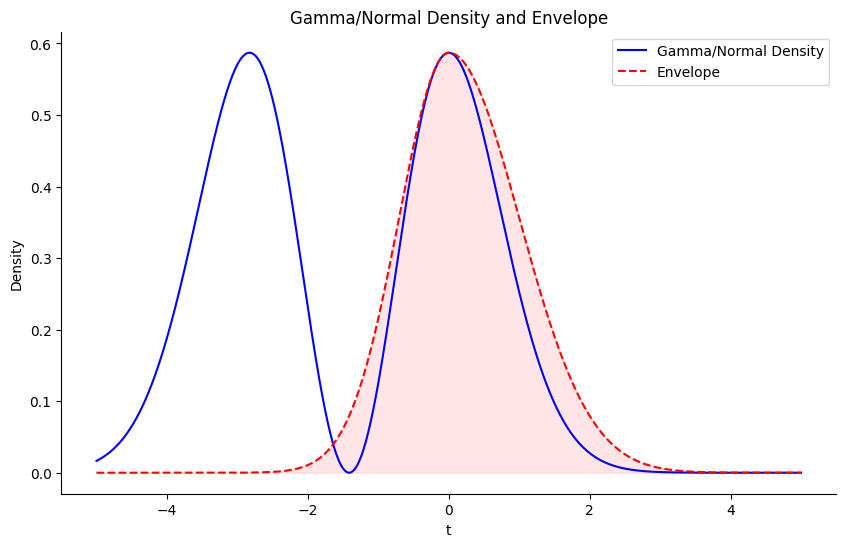

In [13]:
alpha = 1.5  # alpha > 1/2
mu = -np.sqrt(2 * alpha - 1)

def f(t):
    return ((t - mu)**(2*alpha-1) * np.exp(-(t - mu)**2 / 2)) / (2**(alpha - 1) * sc.gamma(alpha))
 
f_at_0 = f(0)
C1 = f_at_0 / stats.norm.pdf(0, 0, 1)
C2 = f_at_0 / stats.norm.pdf(0, 0, np.sqrt(0.5))

def g(t):
    return C1*stats.norm.pdf(t, 0, 1) if t >= 0 else C2*stats.norm.pdf(t, 0, np.sqrt(0.5))

t_values = np.linspace(-5, 5, 1000)  
f_values = f(t_values)
g_values = np.array([g(t) for t in t_values])

plt.figure(figsize=(10, 6))
plt.plot(t_values, f_values, label='Gamma/Normal Density', color='blue')
plt.plot(t_values, g_values, label='Envelope', color='red', linestyle='--')
plt.fill_between(t_values, g_values, color='red', alpha=0.1)
plt.xlabel('t')
plt.ylabel('Density')
plt.title('Gamma/Normal Density and Envelope')
plt.legend()
sns.despine()
plt.show()